## Home Spun Convolutions and Pooling
---
This notebook contains some simple approaches to examine how 
the processes of convolutions and pooling effect image processing.

In [1]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
i = misc.ascent()  # Generating a dummy image to play with

Now we use the pyplot library to examine the image we just instantiated

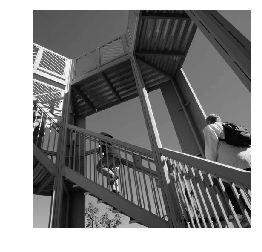

(512, 512)

In [10]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()
np.shape(i)

Here we can see this image is stored as a 512 by 512 array.
Let's transform it so we can deal with a single vector

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
# Now we create a 3x3 filter array

# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
# filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter = [ [-1, 0, 2], [-2, 0, 3], [-1, 0, 2]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now we will create a convolution.  We iterate over the image, leaving a
1 pixel margin and multiply out the values by the filter array used above.

In [6]:
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x-1, y-1]* filter[0][0])
        convolution = convolution + (i[x, y-1]* filter[0][1])
        convolution = convolution + (i[x+1, y-1]* filter[0][2])
        convolution = convolution + (i[x-1, y]* filter[1][0])
        convolution = convolution + (i[x, y]* filter[1][1])
        convolution = convolution + (i[x+1, y]* filter[1][2])
        convolution = convolution + (i[x-1, y+1]* filter[2][0])
        convolution = convolution + (i[x, y+1]* filter[2][1])
        convolution = convolution + (i[x+1, y+1]* filter[2][2])
        convolution = convolution * weight
        # Relu activation layer
        if (convolution<0):
            convolution = 0
        if convolution > 255:
            convolution = 255
        i_transformed[x, y] = convolution
            
        
        

Now let's plot oour convolved image

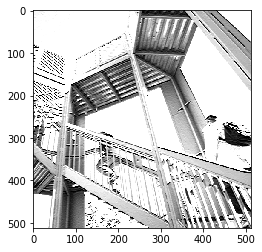

In [7]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

Here we can see the edges are really jumping out.  Now let's implement a 2x2 pooling algorithm

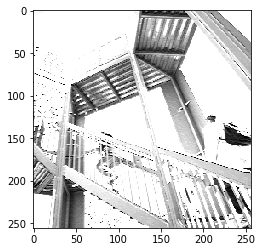

In [8]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()    

Here we can see that the number of pixels is half for each axis.